# 正規分布とその応用

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set

%precision 3

%matplotlib inline

## 確率密度

In [2]:
sp.pi

3.142

In [3]:
# 自然対数の底
# eの1乗
sp.exp(1)

2.718

In [8]:
# 平均4、分散0.64（標準偏差0.8）、確率変数3のときの確率密度を求めたい
x = 3
mu = 4
sigma = 0.8

# 確率密度 N(3|3,0.8^2)
1 / (sp.sqrt(2 * sp.pi * sigma**2)) * sp.exp(- ((x - mu)**2) / (2 * sigma**2))

0.228

In [9]:
# scipy.stats.pdf関数を使うと簡単に計算できる
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.228

In [10]:
# 平均4、標準偏差0.8を持つ正規分布のインスタンスを生成してから pdf 関数を適用
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.228

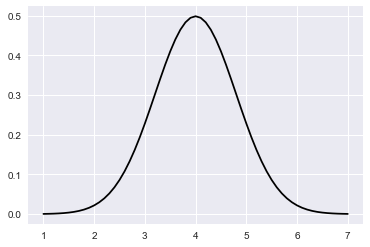

In [11]:
# 確率密度を図示
x_plot = np.arange(start=1, stop=7.1, step=0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x=x_plot, loc=4, scale=0.8),
    color='black'
)

## 標本がある値以下となる割合
ある値以下となったデータの個数 ÷ サンプルサイズ

In [12]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=100000)
simulated_sample

array([ 5.299,  3.511,  3.577, ...,  4.065,  4.275,  3.402])

In [13]:
# 3以下となるデータの個数
sp.sum(simulated_sample <= 3)

10371

In [14]:
# 10.4%
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.104

## 累積分布関数
ある値以下となる確率を計算してくれる   
分析関数ともいう

In [16]:
# cdf(Cumulative Distribution Function)関数
# 母集団分布がN(x:4,0.8^2)のときに、この確率分布から得られた確率変数が3以下の値となる確率を計算
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.106

In [17]:
# 正規分布は平均に対して左右対称のため、データが平均以下になる確率は50%
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.500

## 下側確率とパーセント点
下側確率：データがある値以下となる確率のこと   
パーセント点：ある確率になる基準値のこと

In [19]:
# N(x|4,0.8^2)であるときの下側確率が2.5%となるパーセント点
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.432

In [22]:
# 3以下になる確率
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
# パーセント点を求める、それは3
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

3.000

In [23]:
# 下側確率が50%となるパーセント点は平均に一致
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.000

## t値の標本分布
t値は統計量